In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder


In [9]:
base_results = "/home/devika/PhD/S1/Astroinformatics/Project/Results"

feature_files = {
    "raw": os.path.join(base_results, "TESS_features_raw.csv"),
    "median": os.path.join(base_results, "TESS_features_median_after_detrended.csv"),
    "cleaned": os.path.join(base_results, "TESS_features_outliercleaned.csv")
}

def load_data(path):
    df = pd.read_csv(path)
    df = df.dropna()

    # Use the 'Variable_Type' column as label
    if 'Variable_Type' in df.columns:
        df = df.rename(columns={'Variable_Type': 'label'})
    else:
        raise ValueError("Expected 'Variable_Type' column not found.")

    return df

datasets = {key: load_data(path) for key, path in feature_files.items()}


In [14]:
def evaluate_classifier(df, title):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import LabelEncoder
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

    # Drop label and all non-numeric columns
    y = df["label"]
    X = df.drop(columns=["label"])

    # Drop non-numeric columns like Filename, Star_ID, etc.
    X = X.select_dtypes(include=[np.number])

    # Encode target
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # Train classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Predict
    y_pred = clf.predict(X_test)

    # Report
    print(f"\n==== Classification Report: {title} ====\n")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(12, 10))  # Adjust size for better label spacing
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap="viridis", ax=ax, xticks_rotation=90, values_format='d')
    plt.title(f"Confusion Matrix - {title}")
    plt.tight_layout()
    plt.savefig(f"confusion_matrix_{title}.pdf")
    plt.show()

    # Feature Importances
    importances = clf.feature_importances_
    feat_names = X.columns
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 8))
    sns.barplot(x=importances[indices], y=feat_names[indices], palette="crest")
    plt.title(f"Feature Importances - {title}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.savefig(f"feature_importance_{title}.pdf")
    plt.show()



==== Classification Report: RAW ====

              precision    recall  f1-score   support

         ACV       0.00      0.00      0.00         2
         CEP       0.00      0.00      0.00         3
        DCEP       0.82      0.60      0.69        15
     DCEP-FU       0.00      0.00      0.00         2
       DCEPS       0.00      0.00      0.00         1
        DSCT       0.50      0.30      0.38        10
           E       0.00      0.00      0.00         1
          EA       0.78      0.85      0.82        62
          EB       0.40      0.21      0.28        19
          EC       0.80      0.42      0.55        19
          ED       0.00      0.00      0.00         8
          EW       0.76      0.90      0.82       162
        HADS       1.00      0.33      0.50         3
           L       0.40      0.11      0.17        36
         ROT       0.62      0.68      0.65       118
          RR       0.00      0.00      0.00         1
        RRAB       0.80      0.88      0.8

/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

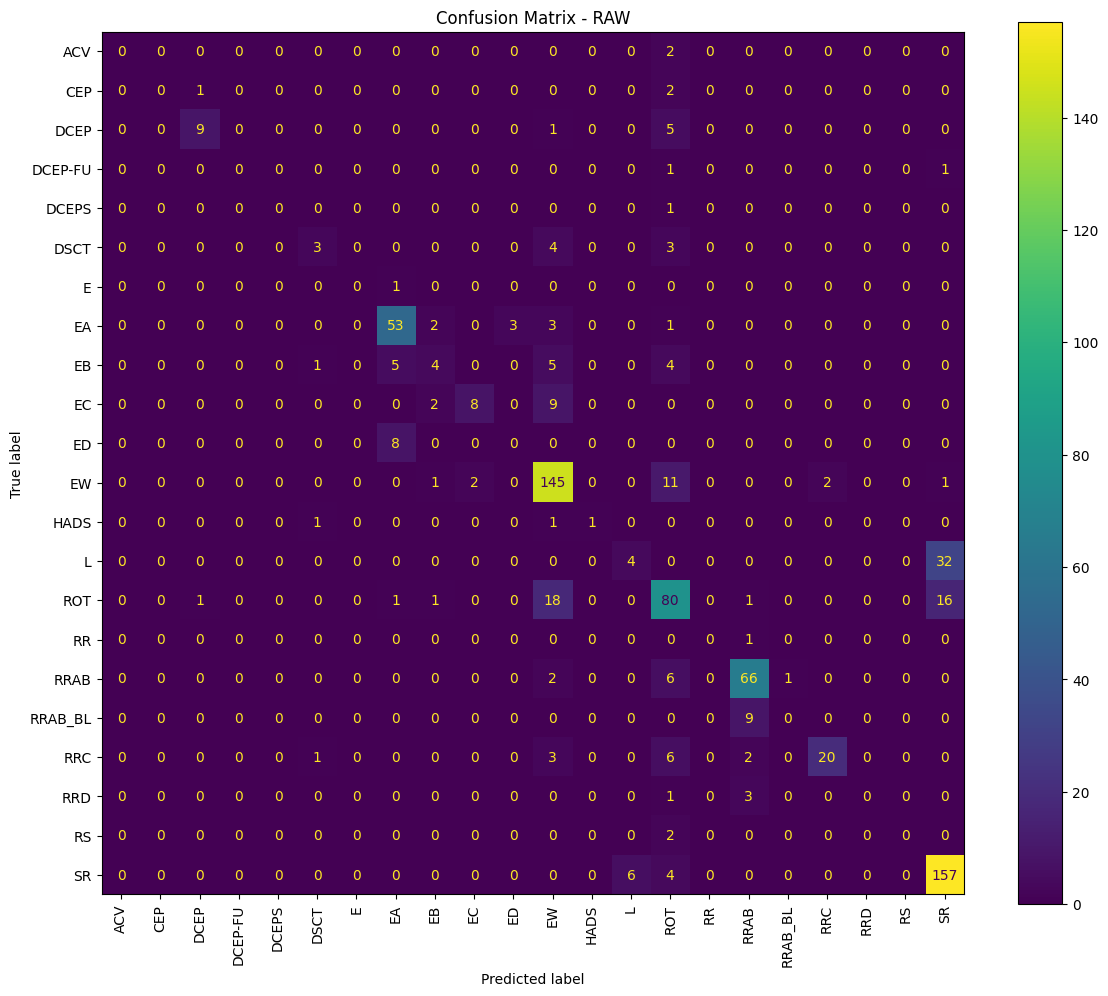

/tmp/ipykernel_7141/2692249951.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feat_names[indices], palette="crest")


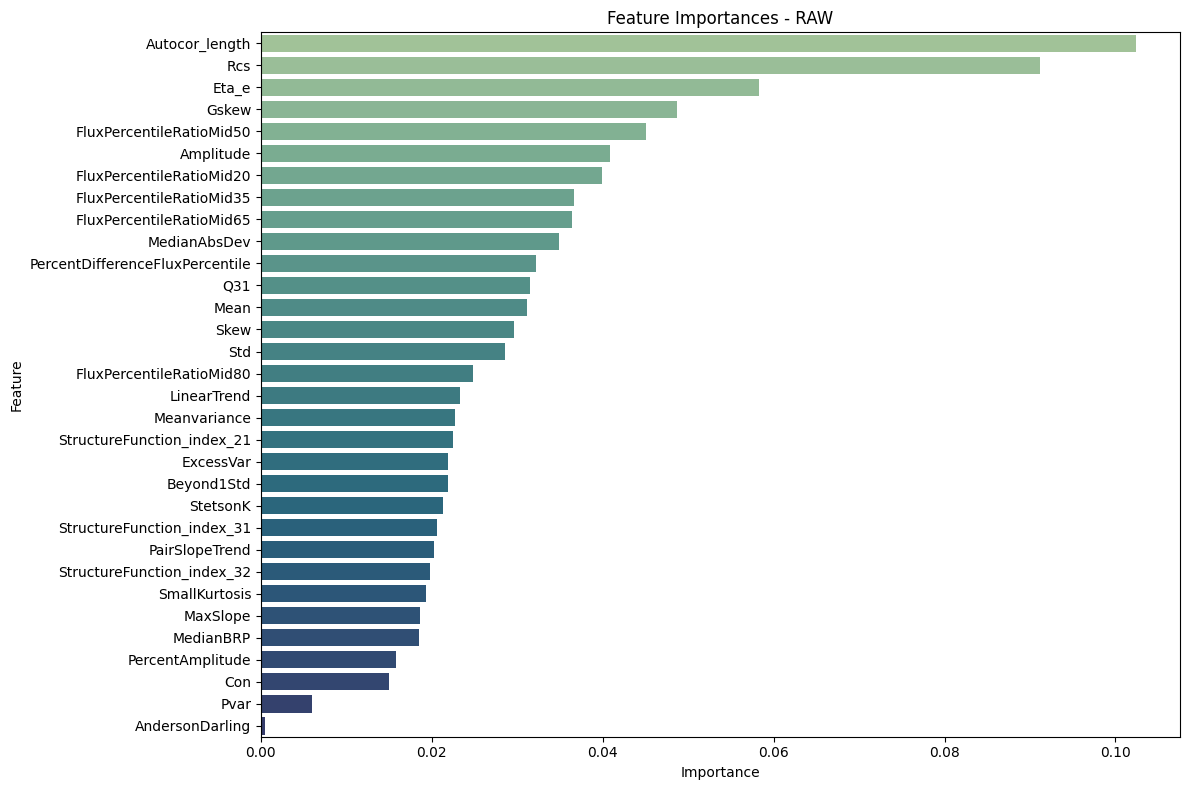


==== Classification Report: MEDIAN ====

                                        precision    recall  f1-score   support

    _lc_median_after_cbv_detrended_ACV       0.00      0.00      0.00         4
    _lc_median_after_cbv_detrended_CEP       0.00      0.00      0.00         4
   _lc_median_after_cbv_detrended_DCEP       0.77      0.67      0.71        15
_lc_median_after_cbv_detrended_DCEP-FU       0.00      0.00      0.00         2
  _lc_median_after_cbv_detrended_DCEPS       0.00      0.00      0.00         1
   _lc_median_after_cbv_detrended_DSCT       0.75      0.64      0.69        14
      _lc_median_after_cbv_detrended_E       0.00      0.00      0.00         2
     _lc_median_after_cbv_detrended_EA       0.77      0.93      0.84        90
     _lc_median_after_cbv_detrended_EB       0.29      0.08      0.13        24
     _lc_median_after_cbv_detrended_EC       0.50      0.36      0.42        25
     _lc_median_after_cbv_detrended_ED       0.00      0.00      0.00        

/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

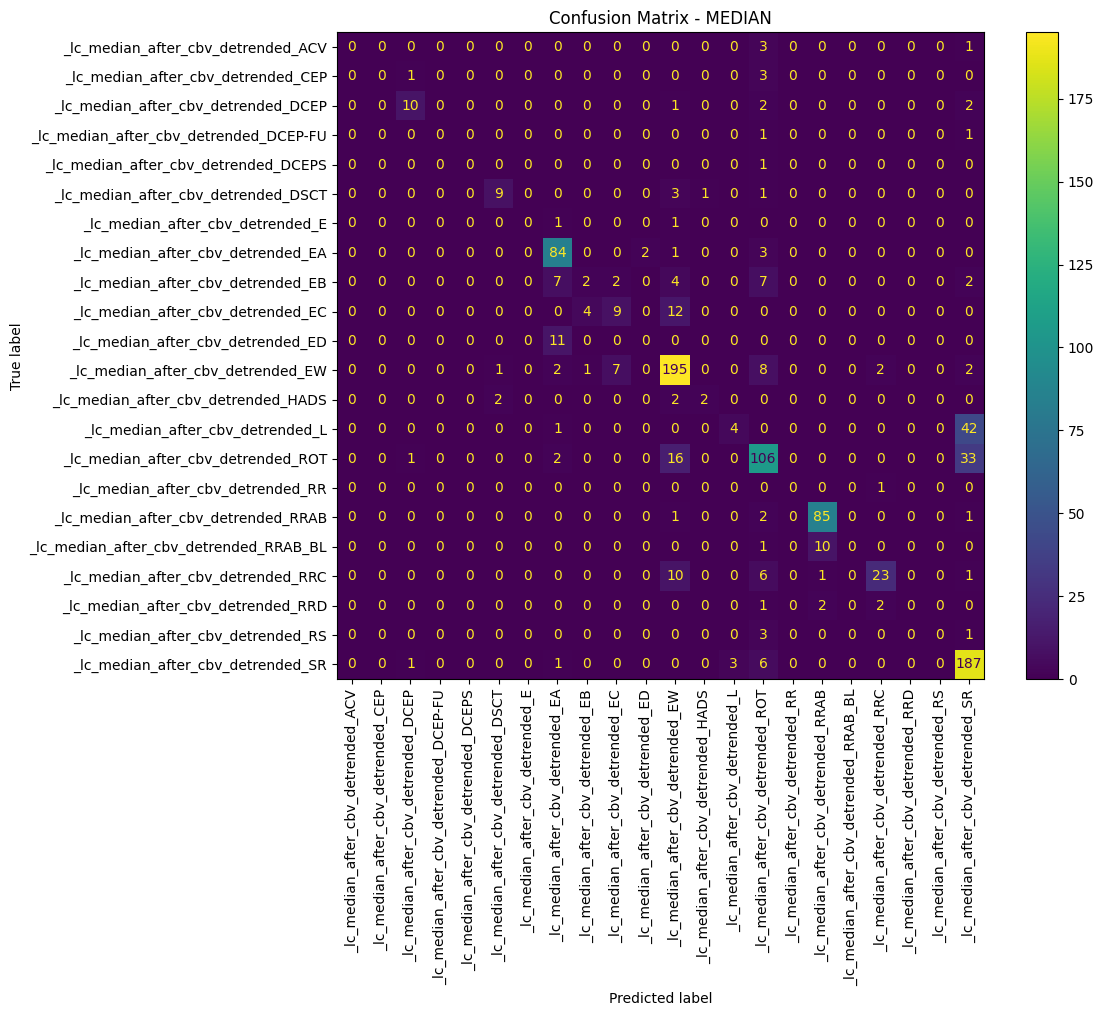

/tmp/ipykernel_7141/2692249951.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feat_names[indices], palette="crest")


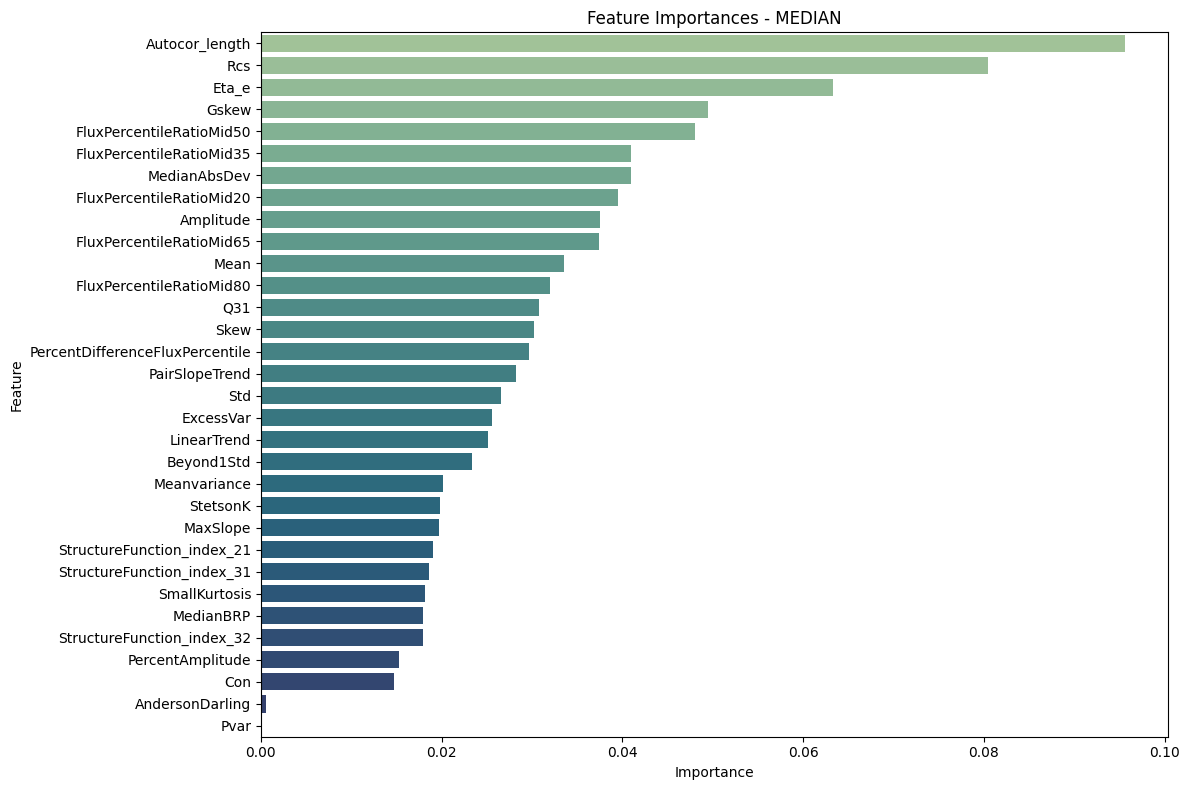


==== Classification Report: CLEANED ====

              precision    recall  f1-score   support

         ACV       0.00      0.00      0.00         4
         CEP       0.00      0.00      0.00         4
        DCEP       0.58      0.73      0.65        15
     DCEP-FU       0.00      0.00      0.00         2
       DCEPS       0.00      0.00      0.00         1
        DSCT       0.57      0.29      0.38        14
           E       0.00      0.00      0.00         2
          EA       0.81      0.89      0.85        90
          EB       0.70      0.29      0.41        24
          EC       0.65      0.52      0.58        25
          ED       0.00      0.00      0.00        11
          EW       0.79      0.90      0.85       218
        HADS       0.60      0.50      0.55         6
           L       0.23      0.06      0.10        47
         ROT       0.74      0.66      0.70       158
          RR       0.00      0.00      0.00         1
        RRAB       0.81      0.96     

/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

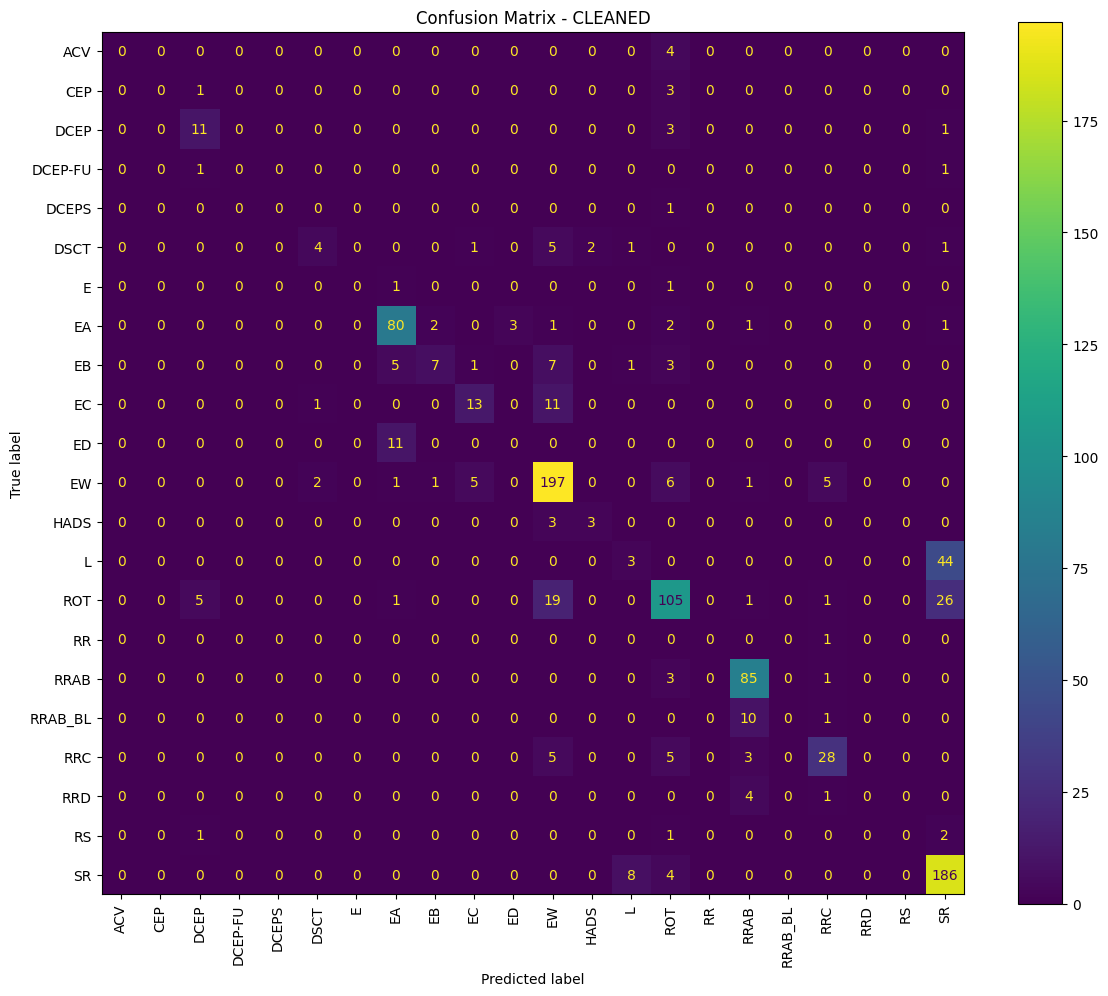

/tmp/ipykernel_7141/2692249951.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feat_names[indices], palette="crest")


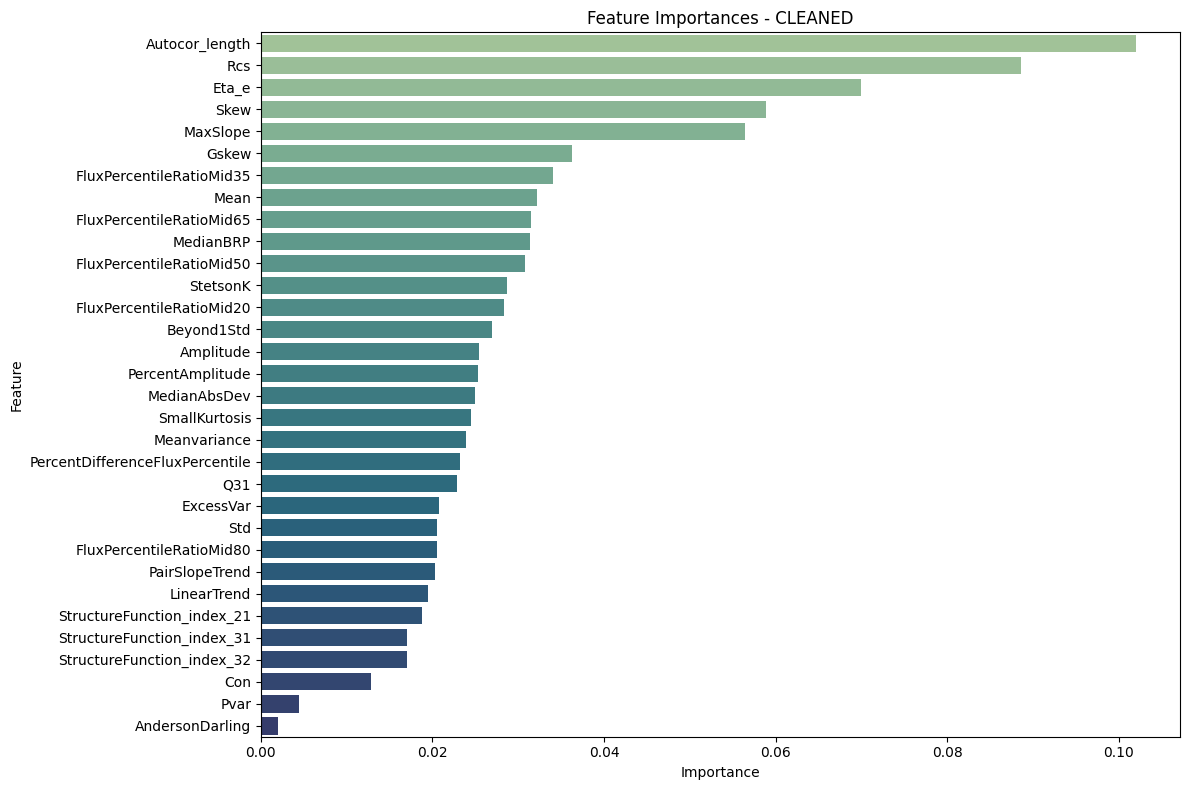

In [15]:
for key, df in datasets.items():
    evaluate_classifier(df, title=key.upper())


In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict

# Define base paths
base_results = "/home/devika/PhD/S1/Astroinformatics/Project/Results"
conf_matrix_dir = os.path.join(base_results, "Confusion_Matrices")
os.makedirs(conf_matrix_dir, exist_ok=True)

# Feature files
feature_files = {
    "raw": os.path.join(base_results, "TESS_features_raw.csv"),
    "median": os.path.join(base_results, "TESS_features_median_after_detrended.csv"),
    "cleaned": os.path.join(base_results, "TESS_features_outliercleaned.csv")
}

# Load datasets
datasets = {}
for name, filepath in feature_files.items():
    df = pd.read_csv(filepath)
    if 'label' not in df.columns:
        if 'Variable_Type' in df.columns:
            df = df.rename(columns={'Variable_Type': 'label'})
        else:
            raise ValueError(f"No 'label' column in {name} dataset")
    datasets[name] = df

def to_density(cf):
    density = []
    n, k = cf.shape
    for i in range(n):
        total = np.sum(cf[i])
        density.append([cf[i][j] / total if total > 0 else 0 for j in range(k)])
    return np.array(density)

def make_confusion_matrix(cf_, xlabel, ylabel, categories_x, categories_y,
                          figsize=(14,12), cmap='Blues', title=None, save_path=None):
    cf = to_density(cf_)
    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=True, fmt=".2f", cmap=cmap,
                xticklabels=categories_x, yticklabels=categories_y,
                cbar=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title:
        plt.title(title)
    if save_path:
        plt.tight_layout()
        plt.savefig(save_path, format='pdf')
    plt.close()

def evaluate_classifier_cv(df, title):
    # Prepare features and labels
    X = df.drop(columns=['label']).select_dtypes(include=[np.number])
    y = df['label']

    # Drop invalid rows
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    valid_idx = ~X.isna().any(axis=1)
    X = X.loc[valid_idx]
    y = y.loc[valid_idx]

    # Encode labels
    y_encoded, label_names = pd.factorize(y)

    # Stratified K-Fold
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

    # Track metrics
    total_cnf = np.zeros((len(label_names), len(label_names)), dtype=int)
    reports = defaultdict(list)

    for train_idx, test_idx in skf.split(X, y_encoded):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

        # Scale
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)

        # Update confusion matrix
        total_cnf += confusion_matrix(y_test, y_pred, labels=range(len(label_names)))

        # Track metrics for each class
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        for lbl in label_names:
            if lbl in report:
                for metric in ['precision', 'recall', 'f1-score']:
                    reports[(lbl, metric)].append(report[lbl][metric])

    # Average classification report
    print(f"\n=== 10-Fold Classification Report: {title} ===")
    for lbl in label_names:
        print(f"{lbl:20s}", end=" ")
        for metric in ['precision', 'recall', 'f1-score']:
            values = reports[(lbl, metric)]
            avg = np.mean(values) if values else 0
            print(f"{metric}: {avg:.2f}", end="  ")
        print()

    # Save confusion matrix plot
    pdf_path = os.path.join(conf_matrix_dir, f"{title}_confusion_matrix.pdf")
    make_confusion_matrix(
        total_cnf,
        xlabel='Predicted Label',
        ylabel='True Label',
        categories_x=label_names,
        categories_y=label_names,
        title=f"10-Fold Confusion Matrix ({title})",
        save_path=pdf_path
    )
    print(f"✅ Saved confusion matrix for '{title}' to: {pdf_path}")

# Run 10-fold classification on each dataset
for name, df in datasets.items():
    evaluate_classifier_cv(df, title=name)


/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(



=== 10-Fold Classification Report: raw ===
DCEPS                precision: 0.00  recall: 0.00  f1-score: 0.00  
RRD                  precision: 0.00  recall: 0.00  f1-score: 0.00  
RRC                  precision: 0.00  recall: 0.00  f1-score: 0.00  
DCEP-FU              precision: 0.00  recall: 0.00  f1-score: 0.00  
DSCT                 precision: 0.00  recall: 0.00  f1-score: 0.00  
RRAB                 precision: 0.00  recall: 0.00  f1-score: 0.00  
RS                   precision: 0.00  recall: 0.00  f1-score: 0.00  
ROT                  precision: 0.00  recall: 0.00  f1-score: 0.00  
EA                   precision: 0.00  recall: 0.00  f1-score: 0.00  
ED                   precision: 0.00  recall: 0.00  f1-score: 0.00  
ACV                  precision: 0.00  recall: 0.00  f1-score: 0.00  
E                    precision: 0.00  recall: 0.00  f1-score: 0.00  
EW                   precision: 0.00  recall: 0.00  f1-score: 0.00  
L                    precision: 0.00  recall: 0.00  f1-scor

/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(



=== 10-Fold Classification Report: median ===
_lc_median_after_cbv_detrended_CEP precision: 0.00  recall: 0.00  f1-score: 0.00  
_lc_median_after_cbv_detrended_ED precision: 0.00  recall: 0.00  f1-score: 0.00  
_lc_median_after_cbv_detrended_EW precision: 0.00  recall: 0.00  f1-score: 0.00  
_lc_median_after_cbv_detrended_RRC precision: 0.00  recall: 0.00  f1-score: 0.00  
_lc_median_after_cbv_detrended_ROT precision: 0.00  recall: 0.00  f1-score: 0.00  
_lc_median_after_cbv_detrended_DCEPS precision: 0.00  recall: 0.00  f1-score: 0.00  
_lc_median_after_cbv_detrended_RS precision: 0.00  recall: 0.00  f1-score: 0.00  
_lc_median_after_cbv_detrended_ACV precision: 0.00  recall: 0.00  f1-score: 0.00  
_lc_median_after_cbv_detrended_EB precision: 0.00  recall: 0.00  f1-score: 0.00  
_lc_median_after_cbv_detrended_L precision: 0.00  recall: 0.00  f1-score: 0.00  
_lc_median_after_cbv_detrended_DCEP precision: 0.00  recall: 0.00  f1-score: 0.00  
_lc_median_after_cbv_detrended_RR precision

/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(



=== 10-Fold Classification Report: cleaned ===
DCEPS                precision: 0.00  recall: 0.00  f1-score: 0.00  
RRD                  precision: 0.00  recall: 0.00  f1-score: 0.00  
RRC                  precision: 0.00  recall: 0.00  f1-score: 0.00  
DCEP-FU              precision: 0.00  recall: 0.00  f1-score: 0.00  
DSCT                 precision: 0.00  recall: 0.00  f1-score: 0.00  
RRAB                 precision: 0.00  recall: 0.00  f1-score: 0.00  
RS                   precision: 0.00  recall: 0.00  f1-score: 0.00  
ROT                  precision: 0.00  recall: 0.00  f1-score: 0.00  
EA                   precision: 0.00  recall: 0.00  f1-score: 0.00  
ED                   precision: 0.00  recall: 0.00  f1-score: 0.00  
ACV                  precision: 0.00  recall: 0.00  f1-score: 0.00  
E                    precision: 0.00  recall: 0.00  f1-score: 0.00  
EW                   precision: 0.00  recall: 0.00  f1-score: 0.00  
L                    precision: 0.00  recall: 0.00  f1-

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, silhouette_score, adjusted_rand_score

from sklearn.manifold import TSNE

# Paths
base_results = "/home/devika/PhD/S1/Astroinformatics/Project/Results"
feature_files = {
    "raw": os.path.join(base_results, "TESS_features_raw.csv"),
    "median": os.path.join(base_results, "TESS_features_median_after_detrended.csv"),
    "cleaned": os.path.join(base_results, "TESS_features_outliercleaned.csv")
}

# Load datasets
datasets = {}
for name, path in feature_files.items():
    df = pd.read_csv(path)
    if 'label' not in df.columns:
        if 'Variable_Type' in df.columns:
            df.rename(columns={'Variable_Type': 'label'}, inplace=True)
        else:
            raise ValueError(f"No label column found in {name}")
    datasets[name] = df

# Helper: plot confusion matrix
def plot_confusion_matrix(cm, labels, title, filename):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=False, xticklabels=labels, yticklabels=labels, cmap='viridis')
    plt.xlabel('Predicted Cluster')
    plt.ylabel('True Label')
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# Helper: 2D visualization
def plot_cluster_2D(X_scaled, labels_true, labels_pred, title, filename):
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_pred, cmap='tab20', s=10, alpha=0.7)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# Main KMeans function
def run_kmeans_clustering(name, df):
    print(f"\n=== KMeans Clustering on {name} dataset ===")

    # Drop label and non-numeric
    X = df.drop(columns=['label']).select_dtypes(include=[np.number])
    y = df['label']

    # Clean invalid values
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    valid_idx = ~X.isna().any(axis=1)
    X = X.loc[valid_idx]
    y = y.loc[valid_idx]

    # Encode labels
    y_encoded, label_names = pd.factorize(y)

    # Scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Clustering
    n_clusters = len(np.unique(y_encoded))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Metrics
    ari = adjusted_rand_score(y_encoded, cluster_labels)
    sil = silhouette_score(X_scaled, cluster_labels)

    print(f"Adjusted Rand Index: {ari:.3f}")
    print(f"Silhouette Score: {sil:.3f}")

    # Confusion matrix
    cm = confusion_matrix(y_encoded, cluster_labels)
    plot_confusion_matrix(cm, label_names, f"KMeans Confusion Matrix ({name})",
                          f"kmeans_confusion_{name}.pdf")

    # 2D visualization
    plot_cluster_2D(X_scaled, y_encoded, cluster_labels,
                    f"KMeans Clusters - {name}", f"kmeans_clusters_{name}.pdf")

# Run on all datasets
for name, df in datasets.items():
    run_kmeans_clustering(name, df)



=== KMeans Clustering on raw dataset ===
Adjusted Rand Index: 0.167
Silhouette Score: 0.154

=== KMeans Clustering on median dataset ===
Adjusted Rand Index: 0.171
Silhouette Score: 0.136

=== KMeans Clustering on cleaned dataset ===
Adjusted Rand Index: 0.191
Silhouette Score: 0.174


In [17]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def to_density(cf):
    density = []
    n, k = cf.shape
    for i in range(n):
        total_stars = cf[i].sum()
        density_row = []
        for j in range(k):
            density_row.append(cf[i][j] / total_stars if total_stars > 0 else 0)
        density.append(density_row)
    return np.array(density)

def make_confusion_matrix(cf_,
                          xlabel, ylabel,
                          categories_x='auto',
                          categories_y='auto',
                          count=True,
                          figsize=(14, 12),
                          cmap='Blues',
                          title=None,
                          save_path=None):
    cf = to_density(cf_)
    group_counts = ["{0:0.2f}".format(value) for value in cf.flatten()]
    box_labels = np.asarray(group_counts).reshape(cf.shape[0], cf.shape[1])

    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap,
                xticklabels=categories_x, yticklabels=categories_y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title:
        plt.title(title)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        print(f"Confusion matrix saved as {save_path}")
    else:
        plt.show()

    plt.close()

def run_rf_cv_on_tess_features(csv_path, label_column='Variable_Type', title=''):
    # Load the dataset
    df = pd.read_csv(csv_path)

    # Drop rows with NaNs
    df = df.dropna()

    # Drop non-numeric columns except the label column
    non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    if label_column in non_numeric_cols:
        non_numeric_cols.remove(label_column)
    df = df.drop(columns=non_numeric_cols)

    # Extract features and labels
    X = df.drop(columns=[label_column]).values
    y = df[label_column].values

    class_names = sorted(np.unique(y))
    label_mapping = {label: idx for idx, label in enumerate(class_names)}
    y_encoded = np.array([label_mapping[label] for label in y])

    folds = 10
    k_fold = KFold(folds, shuffle=True, random_state=1)
    predicted_targets = []
    actual_targets = []

    for train_ix, test_ix in k_fold.split(X):
        train_x, test_x = X[train_ix], X[test_ix]
        train_y, test_y = y_encoded[train_ix], y_encoded[test_ix]

        scaler = StandardScaler()
        train_x = scaler.fit_transform(train_x)
        test_x = scaler.transform(test_x)

        classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        classifier.fit(train_x, train_y)

        predicted_labels = classifier.predict(test_x)

        predicted_targets.extend(predicted_labels)
        actual_targets.extend(test_y)

    predicted_targets = np.array(predicted_targets)
    actual_targets = np.array(actual_targets)

    cnf_matrix = confusion_matrix(actual_targets, predicted_targets, labels=range(len(class_names)))
    print("Confusion Matrix:\n", cnf_matrix)

    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    TPR = np.divide(TP, TP + FN, out=np.zeros_like(TP, dtype=float), where=(TP + FN) != 0)
    FPR = np.divide(FP, FP + TN, out=np.zeros_like(FP, dtype=float), where=(FP + TN) != 0)
    ACC = np.divide(TP + TN, TP + FP + FN + TN)

    print("\nTrue Positive Rate (Recall):", TPR)
    print("False Positive Rate:", FPR)
    print("Accuracy per class:", ACC)
    print("Mean accuracy: {:.3f}".format(np.mean(ACC)))

    # Prepare save path directory and filename
    save_dir = "/home/devika/PhD/S1/Astroinformatics/Project/Results/"
    os.makedirs(save_dir, exist_ok=True)
    save_filename = os.path.join(save_dir, f"Confusion_Matrix_{title.replace(' ', '_')}.pdf")

    make_confusion_matrix(
        cnf_matrix,
        xlabel='Predicted',
        ylabel='True',
        categories_x=class_names,
        categories_y=class_names,
        title=f"Confusion Matrix - {title}",
        save_path=save_filename
    )

# Example usage calls:
run_rf_cv_on_tess_features(
    "/home/devika/PhD/S1/Astroinformatics/Project/Results/TESS_features_raw.csv",
    label_column="Variable_Type",
    title="Raw TESS Features"
)

run_rf_cv_on_tess_features(
    "/home/devika/PhD/S1/Astroinformatics/Project/Results/TESS_features_median_after_detrended.csv",
    label_column="Variable_Type",
    title="Median-Detrended TESS Features"
)

run_rf_cv_on_tess_features(
    "/home/devika/PhD/S1/Astroinformatics/Project/Results/TESS_features_outliercleaned.csv",
    label_column="Variable_Type",
    title="Outlier-Cleaned TESS Features"
)


Confusion Matrix:
 [[  2   0   0   0   0   0   0   0   0   0   0   0   0   0   9   0   0   0
    0   0   0   1]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0   0  12   0   0   0
    0   0   0   2]
 [  0   0  52   0   0   0   0   0   0   0   0   1   0   0  13   0   4   0
    0   0   0   6]
 [  0   0   4   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   5   0   0   0
    0   0   0   0]
 [  0   0   0   0   0  19   0   0   0   0   0  20   3   0   4   0   0   0
    0   0   0   6]
 [  0   0   0   0   0   0   0   1   0   0   0   1   0   0   0   0   1   0
    0   0   0   1]
 [  0   0   0   0   0   0   0 272   8   1   4  15   0   0   7   0   0   0
    0   0   0   4]
 [  0   0   0   0   0   1   0  20  20   3   0  22   0   0  22   0   1   0
    1   0   0   4]
 [  0   0   0   0   0   0   0   0   5  44   0  43   0   0   0   0   1   0
    2   0   0   0]
 [  0   0   0   0   0   0   0  40   0   0   1   0  

In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def save_combined_roc_efficiency_plot(y_true, y_proba, class_names, save_path):
    n_classes = len(class_names)
    y_true_bin = label_binarize(y_true, classes=range(n_classes))

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # --- ROC Curve ---
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        axes[0].plot(fpr, tpr, lw=2, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")
    axes[0].plot([0, 1], [0, 1], "k--", lw=2)
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate (Recall)")
    axes[0].set_title("ROC Curves by Class")
    axes[0].legend(loc="lower right")

    # --- Completeness vs Efficiency (Recall vs Precision) ---
    for i in range(n_classes):
        precision_vals, recall_vals, _ = precision_recall_curve(y_true_bin[:, i], y_proba[:, i])
        axes[1].plot(recall_vals, precision_vals, lw=2, label=class_names[i])
    axes[1].set_xlabel("Completeness (Recall)")
    axes[1].set_ylabel("Efficiency (Precision)")
    axes[1].set_title("Completeness vs Efficiency by Class")
    axes[1].legend(loc="lower left")

    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

def run_rf_cv_on_tess_features(csv_path, label_column='Variable_Type', title=''):
    # Load data
    df = pd.read_csv(csv_path)
    df = df.dropna()

    # Drop non-numeric columns except label
    non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    non_numeric_cols = [col for col in non_numeric_cols if col != label_column]
    df = df.drop(columns=non_numeric_cols)

    # Extract features and labels
    X = df.drop(columns=[label_column]).values
    y = df[label_column].values
    class_names = sorted(np.unique(y))

    # Encode string labels to integers
    label_mapping = {label: idx for idx, label in enumerate(class_names)}
    y_encoded = np.array([label_mapping[label] for label in y])

    folds = 10
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)

    actual_targets = []
    predicted_probas = []

    for train_ix, test_ix in kf.split(X):
        train_x, test_x = X[train_ix], X[test_ix]
        train_y, test_y = y_encoded[train_ix], y_encoded[test_ix]

        scaler = StandardScaler()
        train_x = scaler.fit_transform(train_x)
        test_x = scaler.transform(test_x)

        clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        clf.fit(train_x, train_y)
        probs = clf.predict_proba(test_x)

        predicted_probas.append(probs)
        actual_targets.append(test_y)

    predicted_probas = np.vstack(predicted_probas)
    actual_targets = np.concatenate(actual_targets)

    # Save path
    save_dir = "/home/devika/PhD/S1/Astroinformatics/Project/Results/"
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, f"{title.replace(' ', '_')}_ROC_Efficiency.pdf")

    # Plot and save combined diagnostic plot
    save_combined_roc_efficiency_plot(actual_targets, predicted_probas, class_names, save_path)


In [21]:
run_rf_cv_on_tess_features(
    "/home/devika/PhD/S1/Astroinformatics/Project/Results/TESS_features_raw.csv",
    label_column="Variable_Type",
    title="Raw TESS Features"
)

run_rf_cv_on_tess_features(
    "/home/devika/PhD/S1/Astroinformatics/Project/Results/TESS_features_median_after_detrended.csv",
    label_column="Variable_Type",
    title="Median-Detrended TESS Features"
)

run_rf_cv_on_tess_features(
    "/home/devika/PhD/S1/Astroinformatics/Project/Results/TESS_features_outliercleaned.csv",
    label_column="Variable_Type",
    title="Outlier-Cleaned TESS Features"
)


/tmp/ipykernel_12488/789053367.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(loc="lower right")
/tmp/ipykernel_12488/789053367.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(loc="lower left")
